In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("https://github.com/HamoyeHQ/HDSC-Time-series-analysis-and-forecast/files/7768846/Time_series_analysis_and_forecast_DATASET.csv")
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [ ]:
!pip install prophet
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from pylab import rcParams
from prophet import Prophet

     |████████████████████████████████| 65 kB 3.5 MB/s 
     |████████████████████████████████| 49 kB 5.8 MB/s 
     |████████████████████████████████| 45 kB 2.7 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6639935 sha256=da9c8f123fdd6282d5f5ba34fd72ff79b3dd074afb8dee85680d076151f94e63
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


In [ ]:
df['FullDate'] = pd.to_datetime(df['FullDate'])
df.set_index('FullDate', inplace = True)

In [ ]:
# Resample the data from an hour sampling rate to a daily sampling rate (i.e sum over the hours for each day). Which of the following is a plot of ElecPrice over time?
df = df.resample('1D').sum()

Text(0, 0.5, 'ElecPrice')

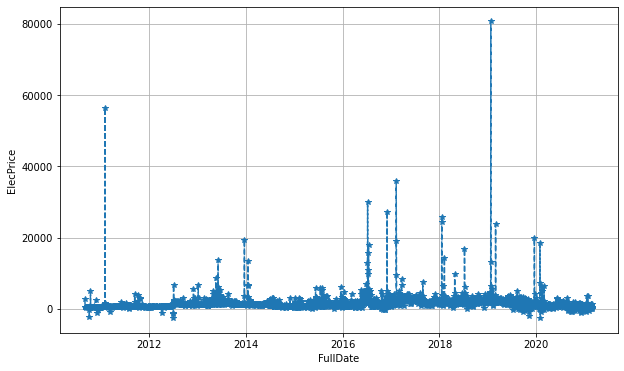

In [ ]:
plt.figure(figsize=( 10 , 6 ))
plt.plot(df.index, df.ElecPrice, '--' , marker= '*' , )
plt.grid()
plt.xlabel('FullDate')
plt.ylabel('ElecPrice')

In [ ]:
# 12 Using the Augmented Dicky Fuller test (ADF), what is the P-value of the SysLoad and GasPrice of the resampled Data set, to 6 decimal places?

adf_result = adfuller(df['SysLoad'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[ 1 ]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')
for k, v in adf_result[4].items():
 print(f' {k} : {v} ') 

ADF Statistic: -3.6901589888366457
p-value: 0.004253725504574117
No. of lags used: 30
No. of observations used : 3803
Critical Values:
 1% : -3.432070672988693 
 5% : -2.8623002987378547 
 10% : -2.567174716967499 


In [ ]:
adf_result = adfuller(df['GasPrice'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[ 1 ]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')
for k, v in adf_result[4].items():
 print(f' {k} : {v} ') 

ADF Statistic: -2.90276669716518
p-value: 0.04502721288462542
No. of lags used: 27
No. of observations used : 3806
Critical Values:
 1% : -3.4320693157877544 
 5% : -2.8622996992165364 
 10% : -2.5671743978048323 


In [ ]:
# 13 Using the Augmented Dicky Fuller test (ADF) what are the 10% and 5% critical values of GasPrice and ElecPrice of the resampled Data set, to 4 decimal places?

adf_result = adfuller(df['ElecPrice'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[ 1 ]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')
for k, v in adf_result[4].items():
 print(f' {k} : {v} ') 

 df.reset_index(inplace = True)

ADF Statistic: -8.269053866873803
p-value: 4.848817773711633e-13
No. of lags used: 20
No. of observations used : 3813
Critical Values:
 1% : -3.432066157296446 
 5% : -2.8622983040036005 
 10% : -2.5671736550459663 


In [ ]:
a = df[['FullDate', 'ElecPrice']]
a.rename(columns = {'FullDate': 'ds', 'ElecPrice': 'y'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
a_train = a[:2757]
a_test = a[2757:]

In [ ]:
model = Prophet()
model.fit(a_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = model.make_future_dataframe(periods = len(a_test), freq = '1D')
predicted = model.predict(future)

In [ ]:
# 14 Evaluating the results of your time series model on the test set, what is the MAPE (in %) in 2 decimal places?

# Hint:

# Define a function that calculates the Mape using the definition of MAPE from the course Module and pass your dataset into it.

def mape(y, y_hat):
    return np.mean(np.abs((y - y_hat)/y)) * 100
    
MAPE = mape(a_test['y'], predicted['yhat'])
print(round(MAPE, 2))

549.48


In [ ]:
# 15 What is the RMSE in 2 decimal places?

def rmse(y, y_hat):
    return np.sqrt(np.mean(np.square(y - y_hat)))
RMSE = rmse(a_test['y'], predicted['yhat'])
print(round(RMSE, 2))

3218.16


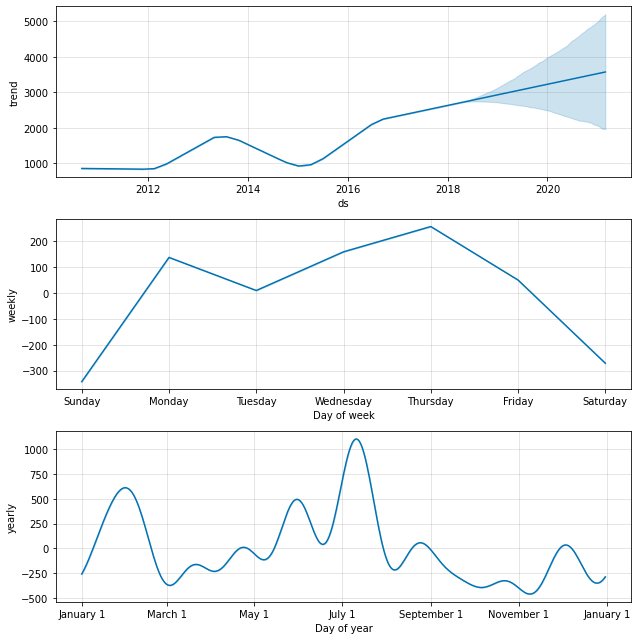

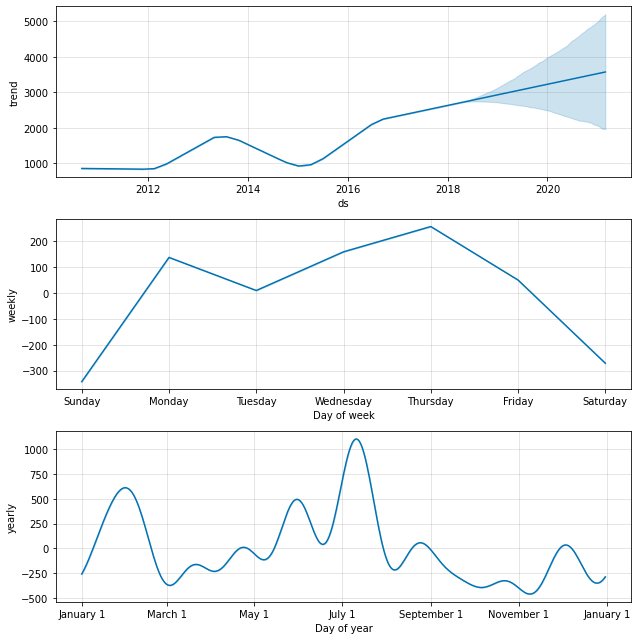

In [ ]:
# 16 If you plot the components from the forecasted model, what month of the yearly seasonality has the highest value?
model.plot_components(predicted)

In [ ]:
df.rename(columns = {'FullDate': 'ds', 'SysLoad': 'add1', 'Tmax': 'add2', 'GasPrice': 'add3', 'ElecPrice': 'y'}, inplace = True)
model = Prophet()

model.add_regressor('add1')
model.add_regressor('add2')
model.add_regressor('add3')
df_train = df[:2757]
df_test = df[2757:]
model.fit(df_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# 17 Evaluating the results of your time series model on the test set, what is the MAPE (in %) in 2 decimal places?
future = model.make_future_dataframe(periods = len(df_test), freq = '1D')
future['add1'] = df['add1']
future['add2'] = df['add2']
future['add3'] = df['add3']
predicted = model.predict(future)
def mape(y, y_hat):
    return np.mean(np.abs((y - y_hat)/y)*100)
MAPE = mape(df_test['y'], predicted['yhat'])
print(round(MAPE, 2))

233.74


In [ ]:
# 18 What is the RMSE in 2 decimal places?
def rmse(y, y_hat):
    return np.sqrt(np.mean(np.square(y - y_hat)))
RMSE = rmse(df_test['y'], predicted['yhat'])
print(round(RMSE, 2))

2709.65


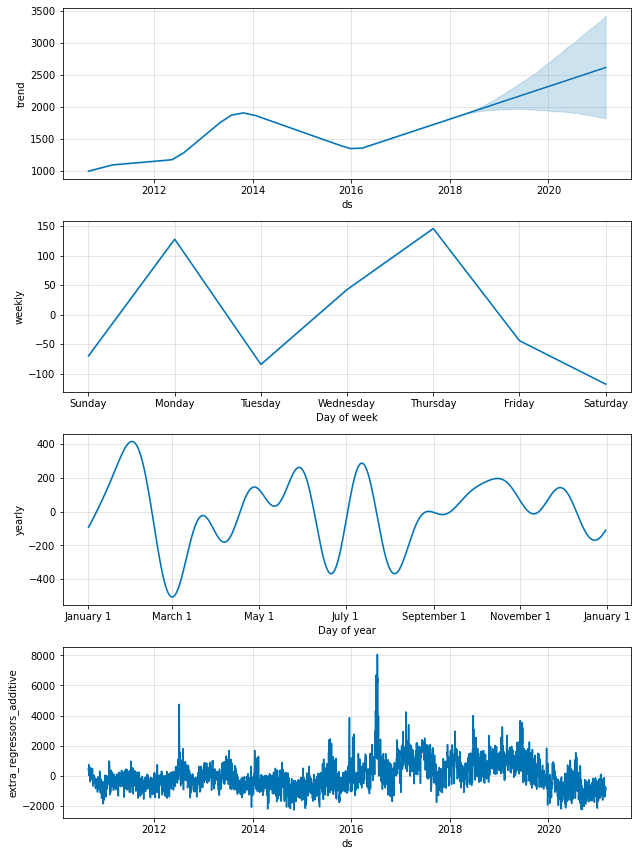

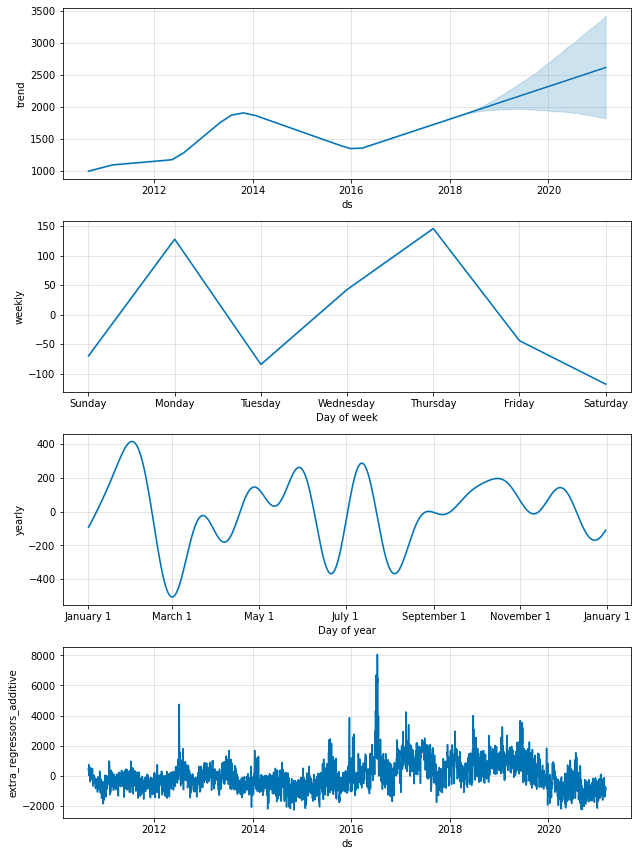

In [ ]:
# 19 If you plot the components from the multivariate forecasted model, what day of the daily seasonality has the highest value?
model.plot_components(predicted)

In [ ]:
# 20 Train a multivariate time series model performing the same train test split as before, but now exclude T-max from the training data(drop T-max),
# What is the mean absolute percentage error (MAPE) to 2 decimal places on the test set?

df.drop(['Tmax'], axis = 1, inplace = True)
df.rename(columns = {'FullDate': 'ds', 'ElecPrice': 'y'}, inplace = True)

In [ ]:
model = Prophet()

model.add_regressor('SysLoad')
model.add_regressor('GasPrice')
df_train = df[:2757]
df_test = df[2757:]
model.fit(df_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = model.make_future_dataframe(periods = len(df_test), freq = '1D')
future['SysLoad'] = df['SysLoad']
future['GasPrice'] = df['GasPrice']
predicted = model.predict(future)
def mape(y, y_hat):
    return np.mean(np.abs((y - y_hat)/y)*100)
MAPE = mape(df_test['y'], predicted['yhat'])
print(round(MAPE, 2))

236.66
